In [1]:
library(jsonlite)
library(ggplot2)
library(lubridate)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [3]:
data.url <- "https://opendata.cwa.gov.tw/fileapi/v1/opendataapi/F-D0047-055?Authorization=CWA-2C779C07-D293-4EA7-BB70-856D1C82B7FA&format=JSON"
data.file <- "Hsinchu_Weather_Forecast.json"
download.file(data.url, data.file)
data <- fromJSON(data.file)

In [3]:
Sys.getlocale()
Sys.setlocale("LC_CTYPE", "zh_TW.UTF-8")

[1] "C"

[1] "zh_TW.UTF-8"

In [4]:
my.location <- data$cwaopendata$dataset$locations$location
my.weatherElement <- my.location[[which(my.location$locationName == "東區"), "weatherElement"]]

In [5]:
my.weatherElement$elementName

[1] "T"                  "Td"                 "RH"                
 [4] "MaxT"               "MinT"               "MaxAT"             
 [7] "MinAT"              "MaxCI"              "MinCI"             
[10] "PoP12h"             "WD"                 "WS"                
[13] "Wx"                 "UVI"                "WeatherDescription"

In [6]:
my.T <- my.weatherElement[[which(my.weatherElement$elementName == "T"), "time"]]
my.maxT <- my.weatherElement[[which(my.weatherElement$elementName == "MaxT"), "time"]]
my.minT <- my.weatherElement[[which(my.weatherElement$elementName == "MinT"), "time"]]

In [7]:
my.df <- data.frame(time = ymd_hms(my.T$startTime, tz = "Asia/Taipei"),
                    T_value = my.T$elementValue$value,
                    max_T_value = my.maxT$elementValue$value,
                    min_T_value = my.minT$elementValue$value)

Date in ISO8601 format; converting timezone from UTC to "Asia/Taipei".



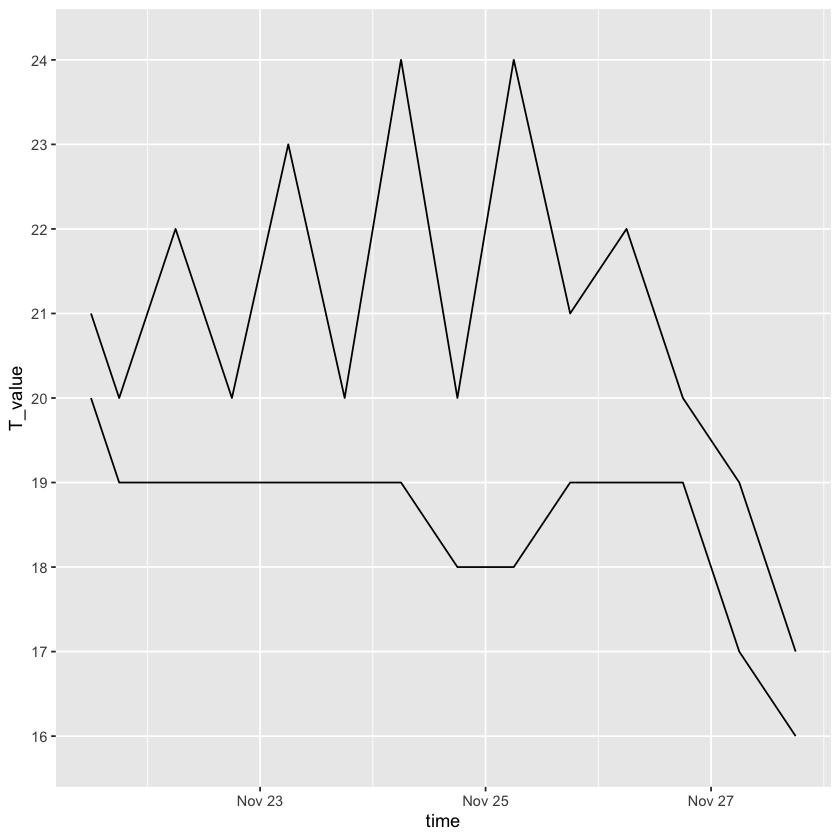

In [8]:
ggplot(my.df, aes(x = time, y = T_value, group = 1)) +
    geom_line(aes(y = min_T_value)) +
    geom_line(aes(y = max_T_value))